<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/Kredi_Kart%C4%B1_Harcama_Hacmi_ve_Ayk%C4%B1r%C4%B1_De%C4%9Fer_Tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def islem_hacmi_verisi_olustur():

    # 60 günlük bir zaman serisi oluşturma
    tarihler = pd.date_range(start='2025-10-01', periods=60, freq='D')

    # Normal günlük işlem hacmi (Ortalama 1.5 Milyon TL, standart sapma 200 bin TL)
    np.random.seed(42)
    hacim = np.random.normal(loc=1_500_000, scale=200_000, size=60)

    # Aykırı Değer Ekleme (Örneğin 40. günde potansiyel Fraud nedeniyle büyük artış)
    hacim[39] += 4_000_000 # 4 milyon TL'lik ekstra bir hacim ekle

    df = pd.DataFrame({
        'Tarih': tarihler,
        'Islem_Hacmi_TL': hacim.round(0)
    })

    return df

In [2]:
def aykiri_deger_analizi(df):

    # Ortalama ve Standart Sapma (STD) hesaplama
    ortalama = df['Islem_Hacmi_TL'].mean()
    std = df['Islem_Hacmi_TL'].std()

    # Aykırı Değer Eşiğini Belirleme (Ortalama + 3 * Standart Sapma)
    ust_esik = ortalama + (3 * std)
    alt_esik = ortalama - (3 * std)

    # Aykırı Değerleri İşaretleme
    df['Aykiri_Deger'] = np.where(
        (df['Islem_Hacmi_TL'] > ust_esik) | (df['Islem_Hacmi_TL'] < alt_esik),
        'Evet',
        'Hayır'
    )

    print("\n--- İşlem Hacmi Aykırı Değer Raporu ---")
    print(f"Ortalama Hacim: {ortalama:,.0f} TL")
    print(f"Üst Eşik (Ortalama + 3*STD): {ust_esik:,.0f} TL")

    aykirilar = df[df['Aykiri_Deger'] == 'Evet']
    if not aykirilar.empty:
        print("\nTespit Edilen Aykırı Günler:")
        print(aykirilar[['Tarih', 'Islem_Hacmi_TL']])
    else:
        print("\nAykırı değer tespit edilmedi.")

    return df, ust_esik

In [3]:
def aykiri_deger_grafik_ciz(df, ust_esik):

    plt.figure(figsize=(14, 7))

    # Ana İşlem Hacmi Çizgisi
    plt.plot(df['Tarih'], df['Islem_Hacmi_TL'], label='Günlük İşlem Hacmi', color='gray')

    # Aykırı Değerleri İşaretleme
    aykirilar = df[df['Aykiri_Deger'] == 'Evet']
    plt.scatter(aykirilar['Tarih'], aykirilar['Islem_Hacmi_TL'],
                color='red', s=100, zorder=5, label='Aykırı Değer (Anomaly)')

    # Aykırı Değer Eşiği Çizgisi
    plt.axhline(y=ust_esik, color='orange', linestyle='--',
                label='3 Sigma Üst Eşik')

    plt.title("Kredi Kartı İşlem Hacmi Trendi ve Aykırı Değer Tespiti", fontsize=16)
    plt.xlabel("Tarih")
    plt.ylabel("İşlem Hacmi (TL)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle=':')
    plt.tight_layout()
    plt.show()

--- Proje 6: Bankacılık Aykırı Değer Tespiti Başladı ---

--- İşlem Hacmi Aykırı Değer Raporu ---
Ortalama Hacim: 1,535,736 TL
Üst Eşik (Ortalama + 3*STD): 3,203,951 TL

Tespit Edilen Aykırı Günler:
        Tarih  Islem_Hacmi_TL
39 2025-11-09       5539372.0


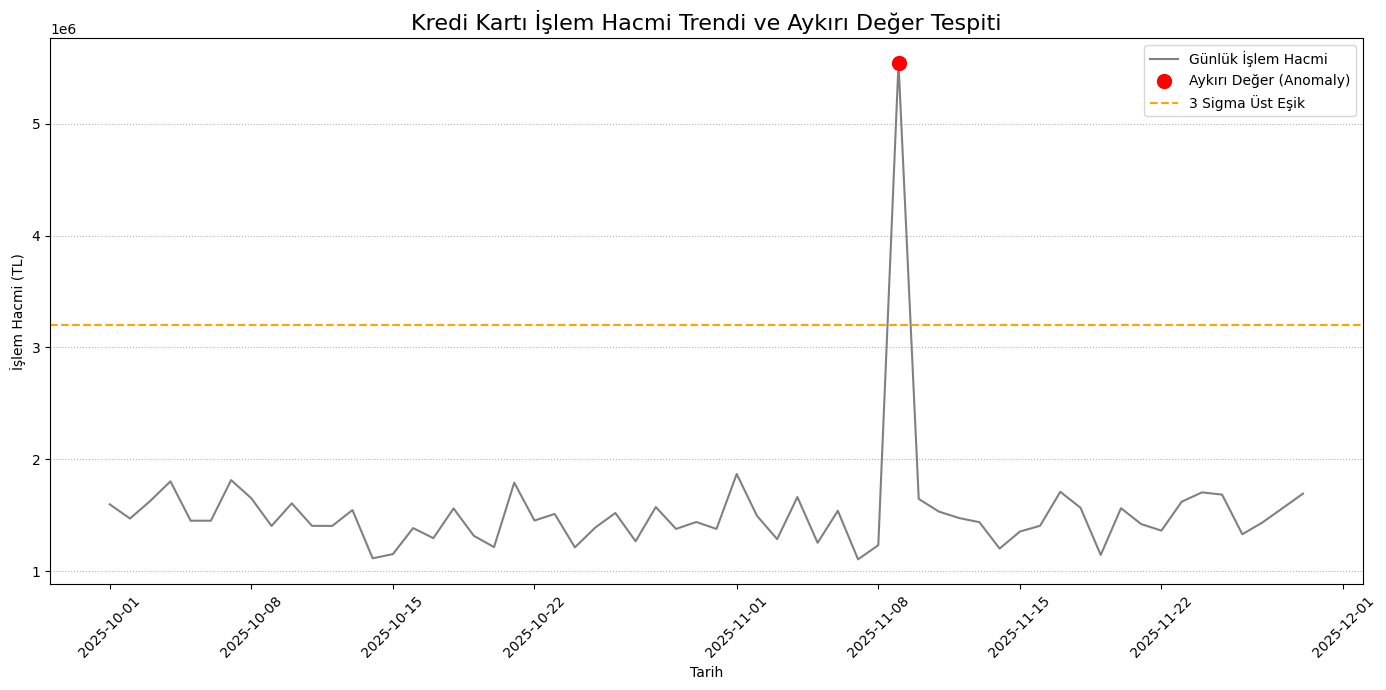

In [4]:
print("--- Proje 6: Bankacılık Aykırı Değer Tespiti Başladı ---")
hacim_df = islem_hacmi_verisi_olustur()
analiz_df, ust_esik_degeri = aykiri_deger_analizi(hacim_df)
aykiri_deger_grafik_ciz(analiz_df, ust_esik_degeri)